Submetric: Parks
======

Introduction
------

Access to parks is a contributing factor in encouraging residents to go outside for recreational purposes. The idea is that the more parks there are in a neighborhood, the easier it is for a resident in that neighborhood to reasonably travel to a park or be motivated to do so. This engagement with parks is directly related to our main metric, Touching Grass, as parks are outside and generally have grass to touch. 

This submetric (Parks in Pittsburgh neighborhoods) uses a dataset that includes information about names and locations of parks in Pittsburgh. To create a measurable and comparable submetric, I chose the quantitative value of # of parks in each neighborhood as the definition of this submetric. 

## Selecting a dataset

The dataset has 200+ data points and comes from the City of Pittsburgh. 

WPRDC has a dataset with better recency about parks in Pittsburgh up. Despite this, I selected the less recent dataset because it could be sorted by neighborhood which is more useful for the purposes of this project. The difference in recency was not large within the context of measuring the # of parks, which is not a value expected to change significantly in a short time period. If I had chosen to define the submetric through total acreage of parks in a neighborhood, the other dataset would be better. However, I believe the actual # of parks as opposed to size supports our main metric better because having multiple locations means parks are more accessible for people living in different parts of the neighborhood. 

## Code & Graphs

First, libraries and the dataset as a csv is imported

In [69]:
#importing in libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# Load in dataset csv
dataset = pd.read_csv("https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d", index_col = "_id")

Let's look at the dataset:

In [40]:
dataset.head() #Display csv dataset in jupyterhub

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


Not every column is needed for the project, so to clean it up only relevant columns are selected (name, type, and neighborhood).

In [119]:
parks = dataset[['name', 'type', 'neighborhood']] 
#create a new dataset using the original that only includes columns for name, type, and neighborhood

parks.sort_values(by="neighborhood").head(16) #Display first 16 rows of data from the new dataset


,name,type,neighborhood
_id,,,
32,Buhl Community Park at Allegheny Square,Park,Allegheny Center
4,Allegheny Commons,Park,Allegheny Center
56,Emerald View Park - Grandview Park,Park,Allentown
57,Emerald View Park - Bigbee Field Park,Park,Allentown
46,Devlin Field Park,Park,Arlington
17,Banksville School Park,Park,Banksville
16,Banksville Park,Park,Banksville
10,Ammon Park,Park,Bedford Dwellings
1,Able Long Park,Park,Beechview


You may notice that not every "park" listed in this dataset is actually a park! Things like traffic islands are not what we are looking for or considering as a "park" and would not have that much of an impact on residents touching grass. Let's select for only true parks to stay true to the chosen submetric. 

In [103]:
query_mask = parks['type'] == "Park" #Create a query mask to look for only parks
parks_only = parks[query_mask]

parks_rank = pd.DataFrame()
parks_rank["num_parks"] = parks_only.groupby("neighborhood").size() 
#create a column that describes the number of parks in each neighborhood

parks_sorted = parks_rank.sort_values(by=['num_parks'], ascending=False) #sort the data by # of parks 
parks_sorted.head() #Display data

,num_parks
neighborhood,
Beechview,6
South Side Slopes,6
Hazelwood,5
Troy Hill,5
Mount Washington,5


Now we can see that these are the neighborhoods with the most amounts of parks. 

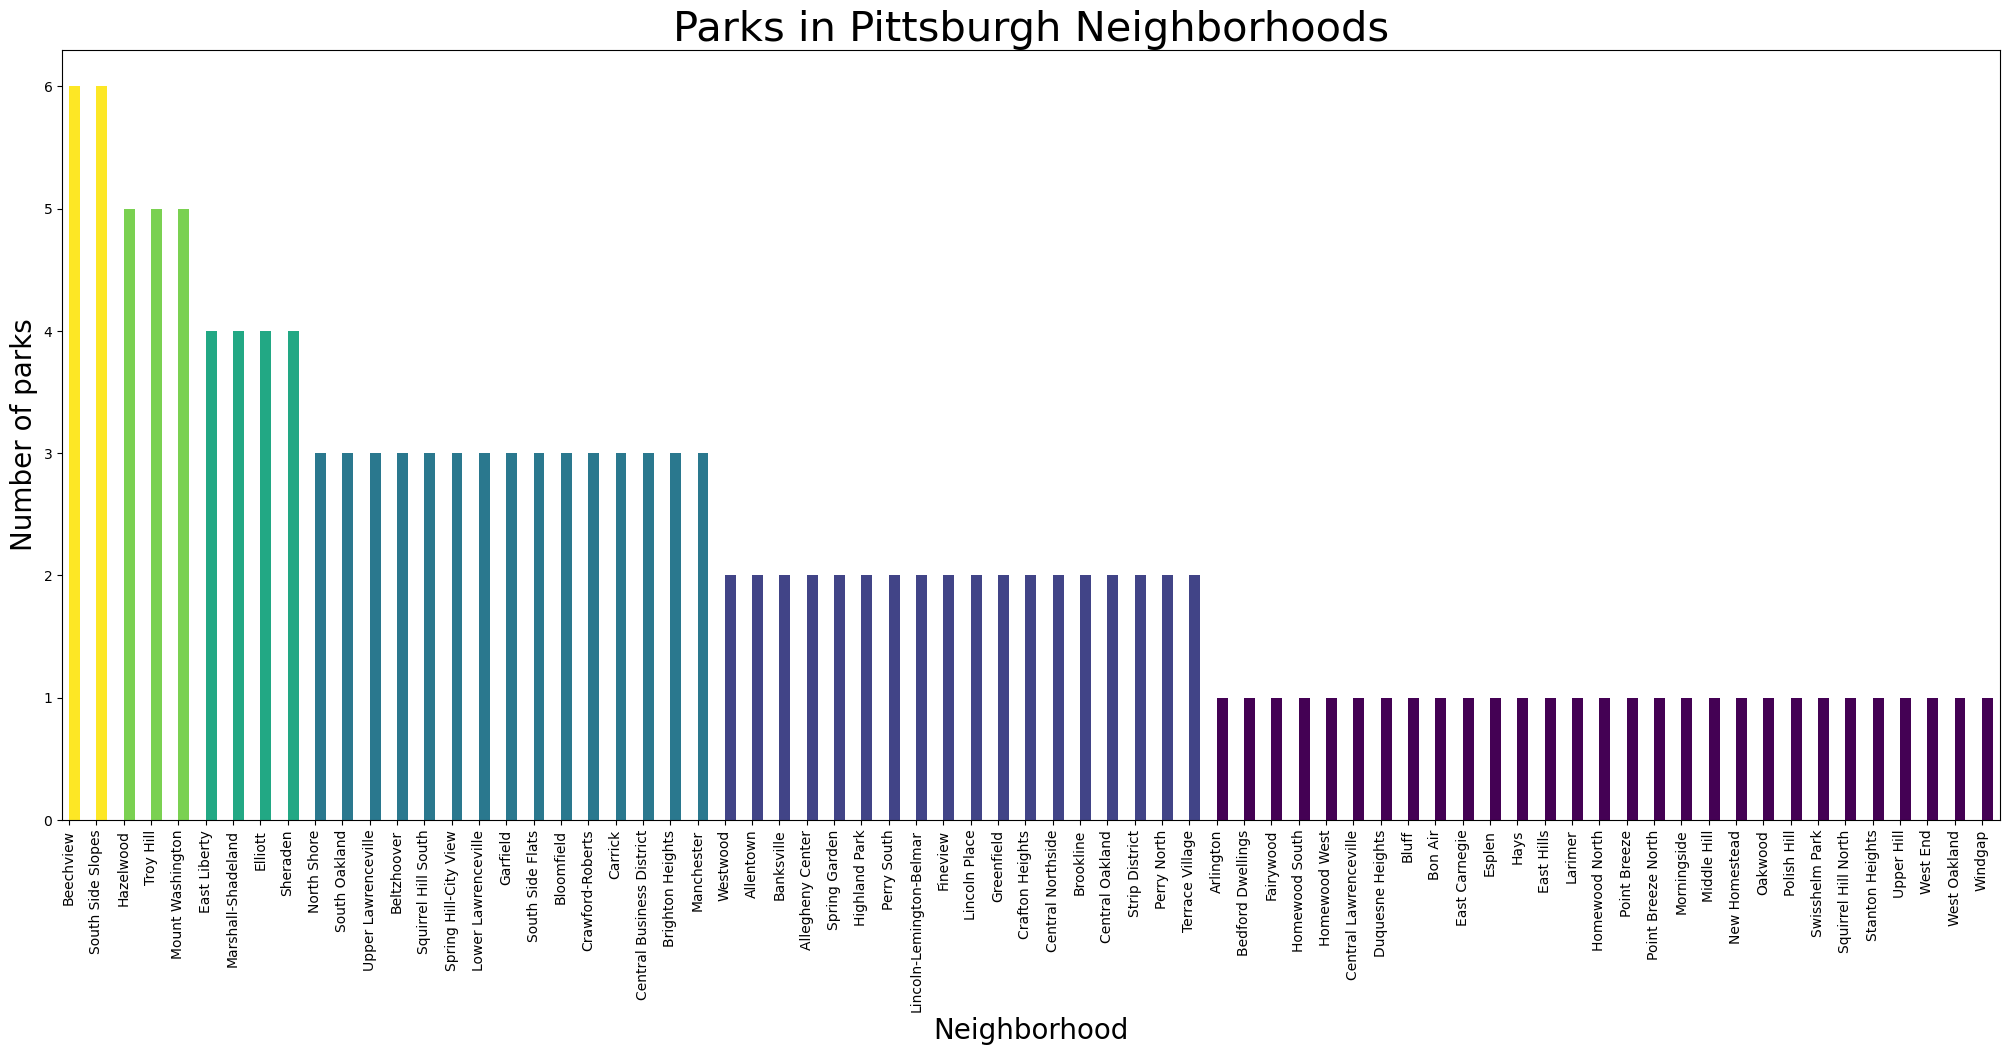

In [117]:
#Add fun coloring to the bars based off of y-axis values
norm = plt.Normalize(np.min(parks_sorted["num_parks"]), np.max(parks_sorted["num_parks"])) 
cmap = plt.cm.viridis #import colormap from matplotlib
bar_colors = [cmap(norm(val)) for val in parks_sorted["num_parks"]] #apply colormap to bars based on value

parks_sorted['num_parks'].plot(kind="bar", width = .4, figsize=(25,10), position=0, color=bar_colors)
plt.xlabel('Neighborhood', fontsize =20)
plt.ylabel('Number of parks', fontsize=20)
plt.title('Parks in Pittsburgh Neighborhoods', fontsize=30)
plt.show() #My graphs don't show up in jupyterlab unless i run this function for some reason lol

Based off of this graph, it appears that *Beechview* and *Southside Slopes* are the neighborhoods with the most parks in Pittsburgh, with 6 parks each. 

However, the data breaks up neighborhoods (such as having West Oakland and South Oakland categorized as different neighborhoods). 

## Conclusion